## Observations and Insights 

### Observations

1. Weight and tumor size are positively correlated.
2. Capomulin and Ramicane had the greatest success in reducing tumor volume over time.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_study_results = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

combined_study_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
len(combined_study_results['Mouse ID'])

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_study_results['Duplicates'] = combined_study_results.duplicated()

study_df = pd.DataFrame(combined_study_results)
study_df 

dupe_df = study_df.loc[study_df['Duplicates'] == True, :]
dupe_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicates
909,g989,Propriva,Female,21,26,0,45.0,0,True


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

dupe_mouse = study_df.loc[study_df['Mouse ID'] == 'g989', :]

dupe_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicates
908,g989,Propriva,Female,21,26,0,45.000000,0,False
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,False
911,g989,Propriva,Female,21,26,5,47.570392,0,False
912,g989,Propriva,Female,21,26,10,51.745156,0,False
913,g989,Propriva,Female,21,26,10,49.880528,0,False
914,g989,Propriva,Female,21,26,15,51.325852,1,False
915,g989,Propriva,Female,21,26,15,53.442020,0,False
916,g989,Propriva,Female,21,26,20,55.326122,1,False
917,g989,Propriva,Female,21,26,20,54.657650,1,False


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_df = study_df[study_df['Mouse ID'] != 'g989']

clean_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicates
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_df)

1880

## Summary Statistics

In [7]:
clean_study_df['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

Ramicane_df = study_df.loc[study_df['Drug Regimen'] == "Ramicane", :]
Capomulin_df = study_df.loc[study_df['Drug Regimen'] == "Capomulin", :]
Infubinol_df = study_df.loc[study_df['Drug Regimen'] == "Infubinol", :]
Placebo_df = study_df.loc[study_df['Drug Regimen'] == "Placebo", :]
Ceftamin_df = study_df.loc[study_df['Drug Regimen'] == "Ceftamin", :]
Stelasyn_df = study_df.loc[study_df['Drug Regimen'] == "Stelasyn", :]
Zoniferol_df = study_df.loc[study_df['Drug Regimen'] == "Zoniferol", :]
Ketapril_df = study_df.loc[study_df['Drug Regimen'] == "Ketapril", :]
Propriva_df = study_df.loc[study_df['Drug Regimen'] == "Propriva", :]
Naftisol_df = study_df.loc[study_df['Drug Regimen'] == "Naftisol", :]

sum_stat_table = [{'Drug Regimen': 'Ramicane', 'Mean Tumor Volume': Ramicane_df['Tumor Volume (mm3)'].mean(), \
                  'Median Tumor Volume': Ramicane_df['Tumor Volume (mm3)'].median(), \
                   'Variance': Ramicane_df['Tumor Volume (mm3)'].var(), \
                   'Standard Deviation': Ramicane_df['Tumor Volume (mm3)'].std(), \
                  'SEM': Ramicane_df['Tumor Volume (mm3)'].sem()},
                  {'Drug Regimen': 'Capomulin', 'Mean Tumor Volume': Capomulin_df['Tumor Volume (mm3)'].mean(), \
                  'Median Tumor Volume': Capomulin_df['Tumor Volume (mm3)'].median(), \
                   'Variance': Capomulin_df['Tumor Volume (mm3)'].var(), \
                   'Standard Deviation': Capomulin_df['Tumor Volume (mm3)'].std(), \
                  'SEM': Capomulin_df['Tumor Volume (mm3)'].sem()},
                 {'Drug Regimen': 'Infubinol', 'Mean Tumor Volume': Infubinol_df['Tumor Volume (mm3)'].mean(), \
                  'Median Tumor Volume': Infubinol_df['Tumor Volume (mm3)'].median(), \
                   'Variance': Infubinol_df['Tumor Volume (mm3)'].var(), \
                   'Standard Deviation': Infubinol_df['Tumor Volume (mm3)'].std(), \
                  'SEM': Infubinol_df['Tumor Volume (mm3)'].sem()},
                 {'Drug Regimen': 'Placebo', 'Mean Tumor Volume': Placebo_df['Tumor Volume (mm3)'].mean(), \
                  'Median Tumor Volume': Placebo_df['Tumor Volume (mm3)'].median(), \
                   'Variance': Placebo_df['Tumor Volume (mm3)'].var(), \
                   'Standard Deviation': Placebo_df['Tumor Volume (mm3)'].std(), \
                  'SEM': Placebo_df['Tumor Volume (mm3)'].sem()},
                 {'Drug Regimen': 'Ceftamin', 'Mean Tumor Volume': Ceftamin_df['Tumor Volume (mm3)'].mean(), \
                  'Median Tumor Volume': Ceftamin_df['Tumor Volume (mm3)'].median(), \
                   'Variance': Ceftamin_df['Tumor Volume (mm3)'].var(), \
                   'Standard Deviation': Ceftamin_df['Tumor Volume (mm3)'].std(), \
                  'SEM': Ceftamin_df['Tumor Volume (mm3)'].sem()},
                 {'Drug Regimen': 'Stelasyn', 'Mean Tumor Volume': Stelasyn_df['Tumor Volume (mm3)'].mean(), \
                  'Median Tumor Volume': Stelasyn_df['Tumor Volume (mm3)'].median(), \
                   'Variance': Stelasyn_df['Tumor Volume (mm3)'].var(), \
                   'Standard Deviation': Stelasyn_df['Tumor Volume (mm3)'].std(), \
                  'SEM': Stelasyn_df['Tumor Volume (mm3)'].sem()},
                 {'Drug Regimen': 'Zoniferol', 'Mean Tumor Volume': Zoniferol_df['Tumor Volume (mm3)'].mean(), \
                  'Median Tumor Volume': Zoniferol_df['Tumor Volume (mm3)'].median(), \
                   'Variance': Zoniferol_df['Tumor Volume (mm3)'].var(), \
                   'Standard Deviation': Zoniferol_df['Tumor Volume (mm3)'].std(), \
                  'SEM': Zoniferol_df['Tumor Volume (mm3)'].sem()},
                 {'Drug Regimen': 'Ketapril', 'Mean Tumor Volume': Ketapril_df['Tumor Volume (mm3)'].mean(), \
                  'Median Tumor Volume': Ketapril_df['Tumor Volume (mm3)'].median(), \
                   'Variance': Ketapril_df['Tumor Volume (mm3)'].var(), \
                   'Standard Deviation': Ketapril_df['Tumor Volume (mm3)'].std(), \
                  'SEM': Ketapril_df['Tumor Volume (mm3)'].sem()},
                 {'Drug Regimen': 'Propriva', 'Mean Tumor Volume': Propriva_df['Tumor Volume (mm3)'].mean(), \
                  'Median Tumor Volume': Propriva_df['Tumor Volume (mm3)'].median(), \
                   'Variance': Propriva_df['Tumor Volume (mm3)'].var(), \
                   'Standard Deviation': Propriva_df['Tumor Volume (mm3)'].std(), \
                  'SEM': Propriva_df['Tumor Volume (mm3)'].sem()},
                     {'Drug Regimen': 'Naftisol', 'Mean Tumor Volume': Naftisol_df['Tumor Volume (mm3)'].mean(), \
                  'Median Tumor Volume': Naftisol_df['Tumor Volume (mm3)'].median(), \
                   'Variance': Naftisol_df['Tumor Volume (mm3)'].var(), \
                   'Standard Deviation': Naftisol_df['Tumor Volume (mm3)'].std(), \
                  'SEM': Naftisol_df['Tumor Volume (mm3)'].sem()},]



sum_stat_df = pd.DataFrame(sum_stat_table)
sum_stat_df


,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,SEM
0,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
1,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
4,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
5,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
6,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
7,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
8,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
9,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar Plots

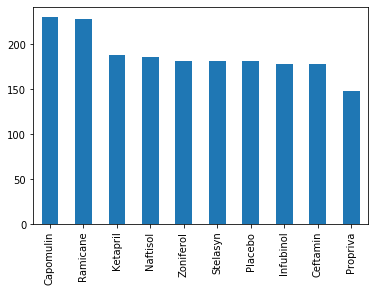

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

clean_study_df['Drug Regimen'].value_counts().plot(kind='bar');


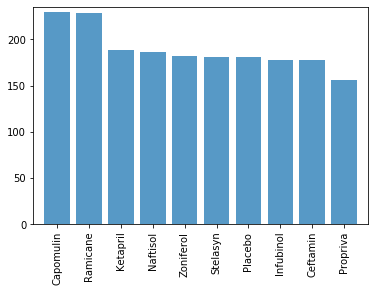

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot

drugs = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"]
number_of_mice = [230, 228, 188, 186, 182, 181, 181, 178, 178, 156]

x_axis = np.arange(0, len(drugs))

plt.xlim(-0.75, len(drugs)-.25)
plt.ylim(0, max(number_of_mice) + 5)

plt.bar(x_axis, number_of_mice, alpha=0.75, align="center")
plt.xticks(x_axis, drugs, rotation='vertical')
plt.show()

## Pie Plots

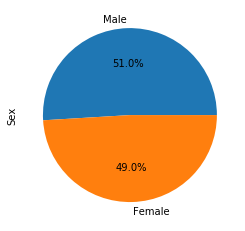

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

clean_study_df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%');


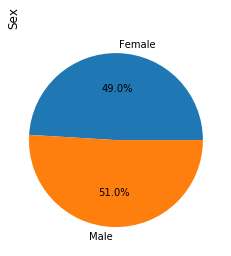

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_group = clean_study_df.groupby('Sex')
mice_gender = mice_gender_group['Sex'].count()
labels = ['Female', 'Male']

plt.pie(mice_gender, labels=labels, autopct="%1.1f%%");
plt.title('Sex', loc='left', rotation='vertical');

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

final_volume = clean_study_df.drop_duplicates(subset=['Mouse ID'], keep = 'last')
final_volume.set_index('Drug Regimen', inplace=True)
top_4 = final_volume.loc[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], :]

quartiles = top_4['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The IQR is {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_volume = top_4.loc[(top_4['Tumor Volume (mm3)'] < lower_bound) | (top_4['Tumor Volume (mm3)'] > upper_bound)]
outlier_volume


The IQR is 22.74251795250001
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicates
Drug Regimen,,,,,,,,


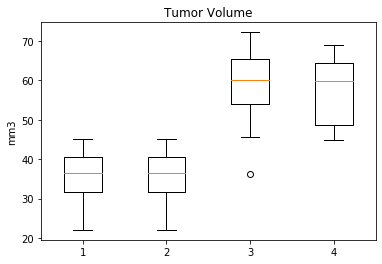

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

cap_vol = final_volume.loc['Capomulin', 'Tumor Volume (mm3)']
ram_vol = cap_vol = final_volume.loc['Ramicane', 'Tumor Volume (mm3)']
infub_vol = final_volume.loc['Infubinol', 'Tumor Volume (mm3)']
cef_vol = final_volume.loc['Ceftamin', 'Tumor Volume (mm3)']

top_volumes = [cap_vol, ram_vol, infub_vol, cef_vol]
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume')
ax1.set_ylabel('mm3')
ax1.boxplot(top_volumes)
plt.show()


## Line and Scatter Plots

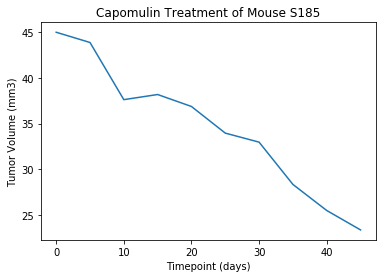

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

cap_mice_df = clean_study_df.loc[study_df['Drug Regimen'] == "Capomulin", :]
s185 = cap_mice_df.loc[cap_mice_df['Mouse ID'] == 's185', :]
s185_volume = s185['Tumor Volume (mm3)'].values.flatten()

x_axis_data = np.arange(0,50,5)

plt.plot(x_axis_data, s185_volume)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Capomulin Treatment of Mouse S185')


plt.show()


C:\Users\17736\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


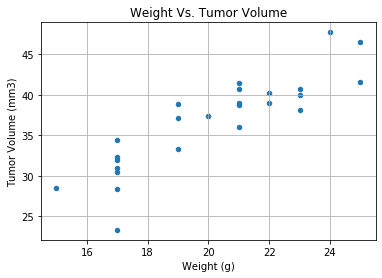

In [16]:
# # Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_data = final_volume.loc['Capomulin', :]


# # # Convert the "horsepower" column to numeric so the data can be used
cap_data['Weight (g)'] = pd.to_numeric(cap_data['Weight (g)'])


# # # Create a scatter plot which compares MPG to horsepower
cap_data.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True,
                title="Weight Vs. Tumor Volume")
#plt.show()



## Correlation and Regression

The correlation between both factors is 0.88


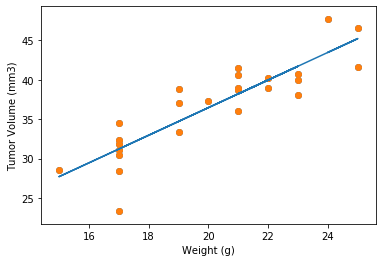

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight = cap_data.iloc[:,3]
tumor_volume = cap_data.iloc[:,5]
correlation = st.pearsonr(weight,tumor_volume)
plt.scatter(weight,tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The correlation between both factors is {round(correlation[0],2)}")

slope, intercept, rvalue, pvalue, stderr = st.linregress(weight, tumor_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,tumor_volume)
plt.plot(weight,regress_values)



plt.show()



